In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

IndentationError: expected an indented block (d2lzh_pytorch.py, line 30)

In [ ]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2),torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] *poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01,size=labels.size()), dtype=torch.float)

In [2]:
print(features[:2], poly_features[:2], labels[:2])

print(features.size())
print(poly_features.size())
print(labels.size())

NameError: name 'features' is not defined

In [3]:
# 本函数已保存在d2lzh_pytorch包中⽅便以后使⽤
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None,y2_vals=None,legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [4]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels,test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear⽂档可知，pytorch已经将参数初始化了，所以我们这⾥就不⼿动初始化了
    batch_size = min(10, train_labels.shape[0]) 
    dataset = torch.utils.data.TensorDataset(train_features,train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size,shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter: 
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        
        train_ls.append(loss(net(train_features),train_labels).item())
        test_ls.append(loss(net(test_features),test_labels).item())
        
    print('final epoch: train loss', train_ls[-1], 'test loss',test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,'\nbias:', net.bias.data)

In [5]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],labels[:n_train], labels[n_train:])

NameError: name 'poly_features' is not defined

final epoch: train loss 43.37651824951172 test loss 94.32615661621094
weight: tensor([[12.4799]]) 
bias: tensor([2.0339])


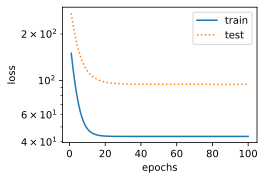

In [53]:
fit_and_plot(features[:n_train, :], features[n_train:, :],labels[:n_train],labels[n_train:])

final epoch: train loss 0.38938698172569275 test loss 280.34765625
weight: tensor([[1.1761, 0.6092, 0.1406]]) 
bias: tensor([4.2659])


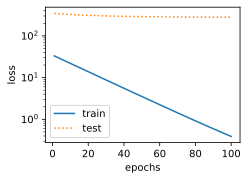

In [54]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],labels[0:2],labels[n_train:])